<h3>Problem Statement

Sales price prediction for BigMart outlets. The data contains approx of 16 different Item Types. Three types of Outlet size (Small, Medium, High), and 4 Outlet Types (Grocery Store, Supermarket type1,Supermarket type2,Supermarket type3).
The goal is to build a predictive model and predict the sales of each products at a particular outlet.

BigMart will try to understand the properties of products and outlets which plays a key role in increasing sales.


<h4>Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
BigMart= pd.read_csv('BigMart.csv')
BigMart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


<h3>Data Analysis

In [4]:
BigMart.shape

(8523, 12)

There are 8523 rows and 12 features.

In [5]:
#Checking for Datatypes
BigMart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 7 Categorical Values and 5 Numerical Values

<h5>Dataset properties



Item_Identifier - Unique product ID

Item_Weight - Weight of product

Item_Fat_Content - Checks the Concentration of fat in the product

Item_Visibility - The % of total display area of all similar products in a store

Item_Type - Product Category

Item_MRP - Maximum Retail Price for a Product

Outlet_Identifier - Store ID

Outlet_Establishment_Year - The year in which store was established

Outlet_Size - The size of the store (Area Size Category)

Outlet_Location_Type - In Terms of city Tiers (Size)

Outlet_Type - Grocery store or a type of supermarket

Item_Outlet_Sales - Sales of the product In the Specific outlet

<h6>Checking for duplicate

In [6]:
BigMart.duplicated().sum()

0

There are no duplicates present in this dataset

<h5>Checking for missing values

In [7]:
BigMart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The values are missing only in 'Item_Weight' and 'Outlet_Size' features . In total there are 3873 values missing

 <h6>Handling missing values

In [8]:
BigMart['Item_Weight'].mean()

12.857645184135976

The mean value of "Item_Weight" is 12.857. We can fill the missing value with the mean value

In [9]:
#Filling the missing values of "Item_Weight"

BigMart["Item_Weight"].fillna(BigMart["Item_Weight"].mean(), inplace= True)

In [10]:
BigMart["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

Medium is more than any other size. So fill the missing values of "Outlet_Size" with mode() i,e (Medium)

In [11]:
#filling the missing values in "Outlet_Size" feature with mode()
Outlet_Size_mode= BigMart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(Outlet_Size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
missing_values= BigMart['Outlet_Size'].isnull()  
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


Converting NaN values to Boolean dtypes. True means NaN present.

In [14]:
BigMart.loc[missing_values, "Outlet_Size"] = BigMart.loc[missing_values,'Outlet_Type'].apply(lambda x: Outlet_Size_mode[x])

In [15]:
#Checking for full values again
BigMart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Successfully handled the missing values. 

<h6>Saving the cleaned data to csv

In [16]:
BigMart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
BigMart["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [18]:
BigMart["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
BigMart["Outlet_Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [20]:
BigMart["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [21]:
BigMart["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<Figure size 600x600 with 0 Axes>

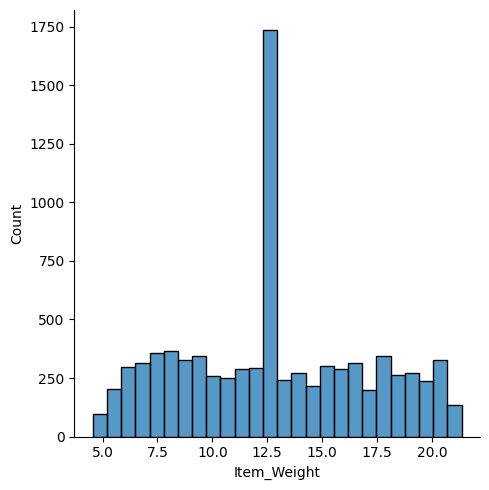

In [22]:
plt.figure(figsize=(6,6))
sns.displot(BigMart["Item_Weight"])
plt.show()

According to the result seen from the graph, most of the items weight about 12.5.

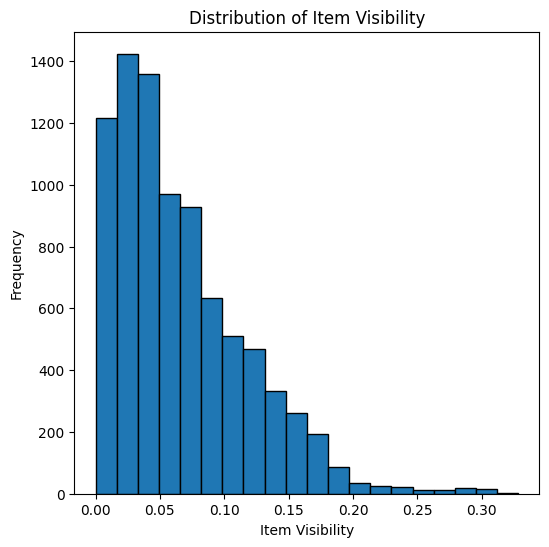

In [23]:
#Item Visibility distribution
plt.figure(figsize=(6, 6))
plt.hist(BigMart['Item_Visibility'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.title('Distribution of Item Visibility')
plt.show()

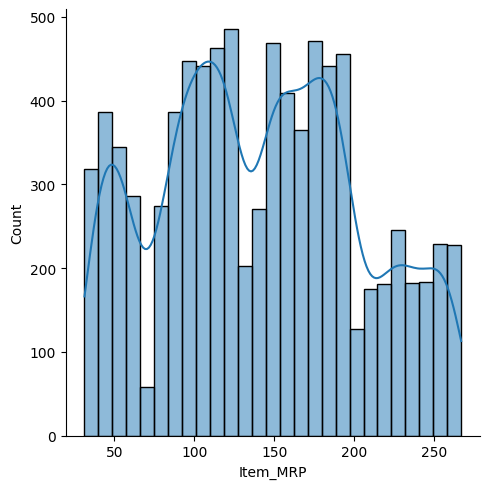

In [24]:
#Item MRP distributon 

sns.displot(BigMart["Item_MRP"], kde= True)



Most Item price are about 100-180.

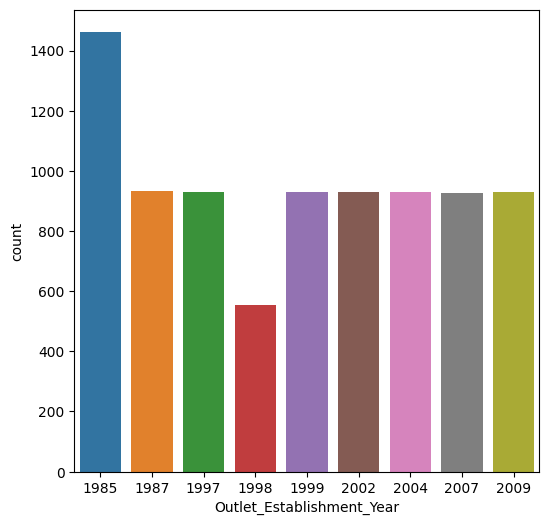

In [25]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=BigMart)
plt.show()

1985 was the year where 80% of the Outlet was established.

Categorical Features

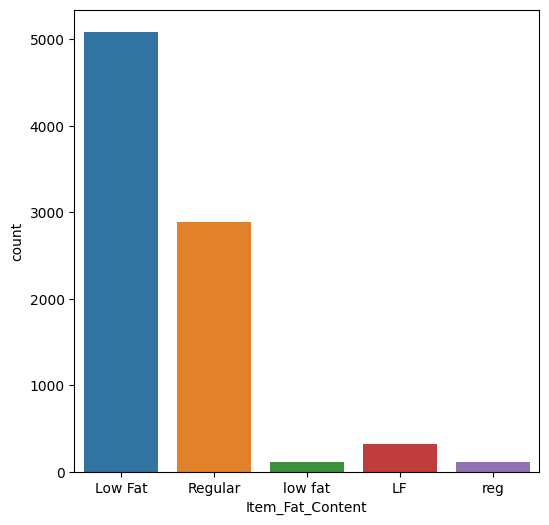

In [27]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=BigMart)
plt.show()

Most Items contains Low Fat.

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

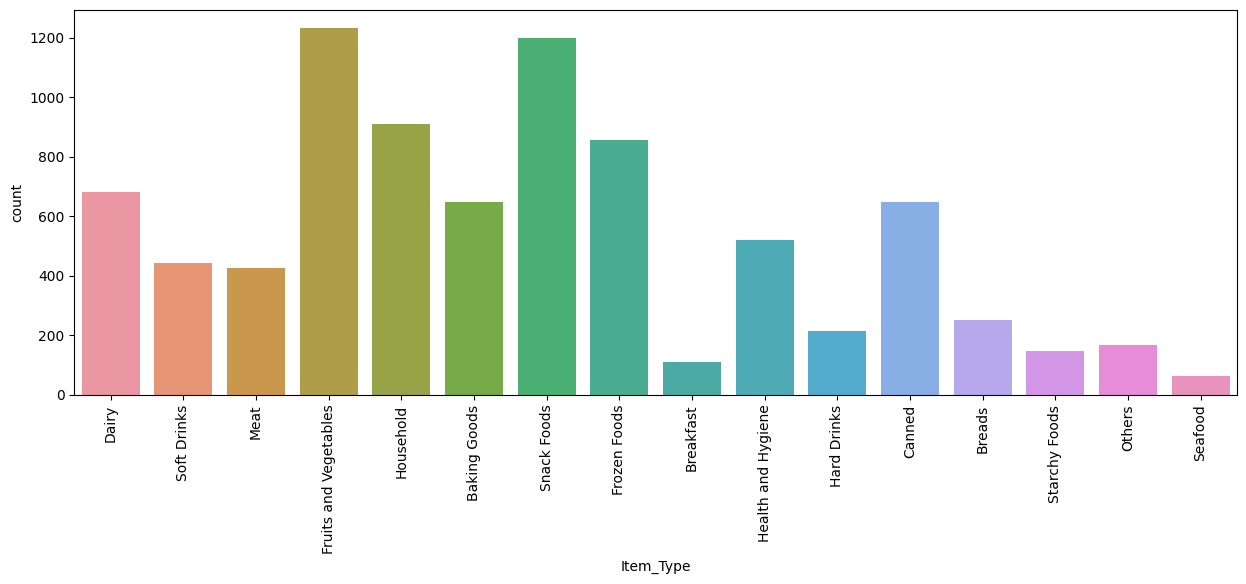

In [28]:
# Item_Type column

plt.figure(figsize=(15,5))
l = list(BigMart['Item_Type'].unique())
chart = sns.countplot(x='Item_Type', data=BigMart)
chart.set_xticklabels(labels=l, rotation=90)

Foods and Vegetables are more available followed by Snack Foods in the store.

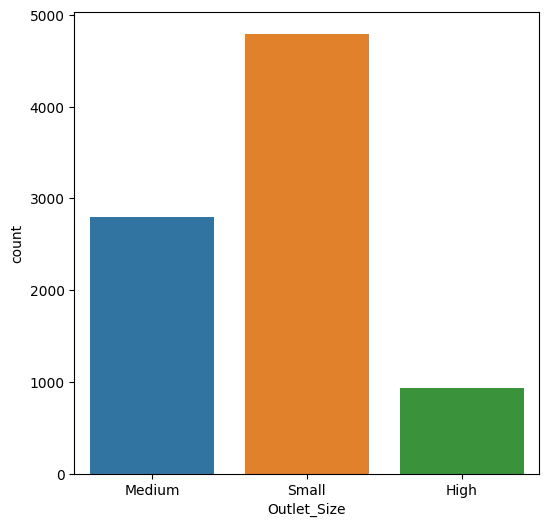

In [29]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=BigMart)
plt.show()

<h3>Corelation Matrix

<Axes: >

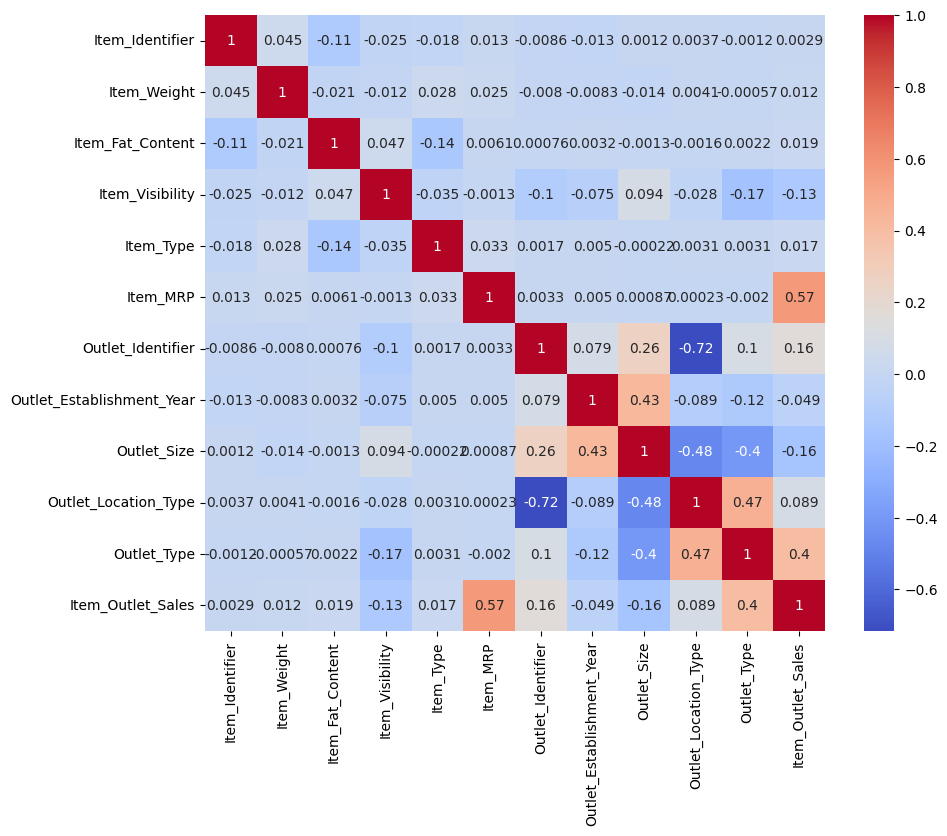

In [48]:
plt.figure(figsize=(10,8))
corr=BigMart.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the heatmap results, Item_MRP has/will have the major impact on the Item_Outlet_Sales

<h3> Data Pre-Processing

In [30]:
BigMart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
BigMart["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [32]:
BigMart["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Here "Low Fat=low fat=LF"  and  "Regular=Reg". Combining it into two counts i,e. Low Fat and Regular

In [33]:
BigMart.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [34]:
BigMart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [35]:
BigMart.to_csv('Cleaned_BigMart.csv')

<h3> Building model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

Label Encoding

Label encoding is a process of converting categorical values (strings) into numerical values. Each unique category is assigned a unique integer label.

In [51]:
encoder = LabelEncoder()

In [52]:
BigMart['Item_Identifier'] = encoder.fit_transform(BigMart['Item_Identifier'])

BigMart['Item_Fat_Content'] = encoder.fit_transform(BigMart['Item_Fat_Content'])

BigMart['Item_Type'] = encoder.fit_transform(BigMart['Item_Type'])

BigMart['Outlet_Identifier'] = encoder.fit_transform(BigMart['Outlet_Identifier'])

BigMart['Outlet_Size'] = encoder.fit_transform(BigMart['Outlet_Size'])

BigMart['Outlet_Location_Type'] = encoder.fit_transform(BigMart['Outlet_Location_Type'])

BigMart['Outlet_Type'] = encoder.fit_transform(BigMart['Outlet_Type'])

In [53]:
BigMart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


splitting features and Target

In [147]:
X= BigMart.drop(columns=["Item_Outlet_Sales", "Item_Identifier","Outlet_Identifier"], axis = 1)
y = BigMart["Item_Outlet_Sales"]

In [148]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,2,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [149]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [151]:
X.shape

(8523, 9)

In [152]:
X_train.shape

(6818, 9)

In [153]:
X_test.shape

(1705, 9)

In [154]:
y.shape

(8523,)

In [155]:
y_train.shape

(6818,)

In [156]:
y_test.shape

(1705,)

In [157]:
reg= LinearRegression()

In [158]:
reg.fit(X_train, y_train)

LinearRegression()

Evalution

In [159]:
y_pred= reg.predict(X_test)

In [160]:
y_pred

array([ 2159.06929232,  3766.11328664,    49.76392281, ...,
        3242.97364696, -1034.75628464,   898.3557086 ])

In [161]:
r2_score(y_test, y_pred)

0.48815586814992673

In [162]:
import pickle
from sklearn.pipeline import make_pipeline

In [163]:
with open ("LinearRegressionModel.pkl", "wb") as file:
    pickle.dump(reg, file)